# Packages

In [1]:
# Standard Python packages
import pandas as pd
import numpy as np
import collections
from IPython.display import display, display_html

# Standard plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Import Network Analysis Packages
import networkx as nx

# Science packages
from scipy.spatial.distance import squareform
from statsmodels.distributions.empirical_distribution import ECDF
from scipy import stats

# sklearn packages for Clustering
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from networkx.algorithms.community import greedy_modularity_communities

import community as community_louvain

# import self created functions
from ipynb.fs.full.functions_cluster_analysis import *
from ipynb.fs.full.functions_data_manipulation import *
from ipynb.fs.full.functions_karrer import *

sns.set(style = 'white')

# Data and Graphs

In [2]:
# Main data, rename 'Probability_of_edge' to 'weight' so it is recognised as weight attribute
data = pd.read_csv("kelch_IBD_graph.csv")
data = data.rename(columns = {'Probability_of_edge':'weight', 'V1': 'source', 'V2': 'target'})

# get parasite types
codes, parasites = pd.factorize(np.concatenate((data['source'], data['target'])))
    
n = 1468            # number of parasites
n1 = data.shape[0]  # number of non-zero entries in adjacency metrix (upper triangular part) (1076778)

# add column, where parasites are indices from 0 to 1467
data['source_ind'] = codes[0:n1]
data['target_ind'] = codes[n1:(2*n1)]
data['type'] = 'undirected'

data = data.reindex(['source', 'target', 'source_ind', 'target_ind', 'weight', 'type'], axis = 1)

In [3]:
# read in meta data
meta = pd.read_csv("meta_data.csv")

# dictionary to destringize node labels, e.g. from '4' to 4
nodes_dict = {}
for key in range(1468):
    nodes_dict[str(key)] = key

In [4]:
G_bin1 = nx.relabel_nodes(nx.read_gml("Export_Graphs/G_bin1.gml"), nodes_dict)
G_bin50 = nx.relabel_nodes(nx.read_gml("Export_Graphs/G_bin50.gml"), nodes_dict)
G_sample = nx.relabel_nodes(nx.read_gml("Export_Graphs/G_sample.gml"), nodes_dict)

G_bin1_lcc = nx.relabel_nodes(nx.read_gml("Export_Graphs/G_bin1_lcc.gml"), nodes_dict)
G_bin50_lcc = nx.relabel_nodes(nx.read_gml("Export_Graphs/G_bin50_lcc.gml"), nodes_dict)
G_sample_lcc = nx.relabel_nodes(nx.read_gml("Export_Graphs/G_sample_lcc.gml"), nodes_dict)

G_sub25 = nx.relabel_nodes(nx.read_gml("Export_Graphs/G_sub25.gml"), nodes_dict)
G_sub50 = nx.relabel_nodes(nx.read_gml("Export_Graphs/G_sub50.gml"), nodes_dict)
G_sub75 = nx.relabel_nodes(nx.read_gml("Export_Graphs/G_sub75.gml"), nodes_dict)

## Load alloc files

In [5]:
col_names = ['Sweep', 'K', 'effective_K', 'Log_lik']

In [9]:
# Load cluster estimates
c_G_bin1 = pd.read_csv("MCMC_clusters/c_G_bin1.csv")
c_G_bin50 = pd.read_csv("MCMC_clusters/c_G_bin50.csv")
c_G_sample = pd.read_csv("MCMC_clusters/c_G_sample.csv")

c_G_bin1_lcc = pd.read_csv("MCMC_clusters/c_G_bin1_lcc.csv")
c_G_bin50_lcc = pd.read_csv("MCMC_clusters/c_G_bin50_lcc.csv")
c_G_sample_lcc = pd.read_csv("MCMC_clusters/c_G_sample_lcc.csv")

c_G_sub25 = pd.read_csv("MCMC_clusters/c_G_sub25.csv")
c_G_sub50 = pd.read_csv("MCMC_clusters/c_G_sub50.csv")
c_G_sub75 = pd.read_csv("MCMC_clusters/c_G_sub75.csv")

In [13]:
mcmc_summary = pd.read_csv("MCMC_clusters/mcmc_summary.csv")
display_html(mcmc_summary)

,Network,Method,Estimate
0,G_bin1,DCSBM_MAP1,22
1,G_bin1,DCSBM_MAP2,22
2,G_bin1,DCSBM_MAP3,25
3,G_bin1,DCSBM_Dahl1,22
4,G_bin1,DCSBM_Dahl2,22
...,...,...,...
103,G_sub75,SBM_MAP2,34
104,G_sub75,SBM_MAP3,32
105,G_sub75,SBM_Dahl1,32
106,G_sub75,SBM1_Dahl2,34


In [25]:
DCSBM_col = ['DCSBM_MAP1','DCSBM_MAP2','DCSBM_MAP3','DCSBM_Dahl1','DCSBM_Dahl2','DCSBM_Dahl3']
SBM_col = ['SBM_MAP1','SBM_MAP2','SBM_MAP3','SBM_Dahl1','SBM_Dahl2','SBM_Dahl3']

In [34]:
display_html(filter_data(mcmc_summary, 'Method', DCSBM_col[:3]).groupby('Network').mean())
display_html(filter_data(mcmc_summary, 'Method', SBM_col[:3]).groupby('Network').mean())
display_html(filter_data(mcmc_summary, 'Method', DCSBM_col[3:]).groupby('Network').mean())
display_html(filter_data(mcmc_summary, 'Method', SBM_col[3:]).groupby('Network').mean())

,Estimate
Network,
G_bin1,23.000000
G_bin50,41.000000
G_bin50_lcc,37.333333
G_bin_1_lcc,20.000000
G_sample,33.666667
G_sample_lcc,32.333333
G_sub25,29.666667
G_sub50,30.666667
G_sub75,31.666667


,Estimate
Network,
G_bin1,27.333333
G_bin50,37.333333
G_bin50_lcc,41.666667
G_bin_1_lcc,22.333333
G_sample,38.000000
G_sample_lcc,37.333333
G_sub25,33.666667
G_sub50,33.000000
G_sub75,33.333333


,Estimate
Network,
G_bin1,23.000000
G_bin50,41.000000
G_bin50_lcc,38.000000
G_bin_1_lcc,20.666667
G_sample,33.333333
G_sample_lcc,32.333333
G_sub25,31.000000
G_sub50,31.333333
G_sub75,31.666667


,Estimate
Network,
G_bin1,31.333333
G_bin50,41.333333
G_bin50_lcc,42.333333
G_bin_1_lcc,22.666667
G_sample,41.333333
G_sample_lcc,37.000000
G_sub25,34.000000
G_sub50,33.666667
G_sub75,32.666667


# Traceplots

## Loading Data

In [ ]:
dir_DCSBM = "Newman_code/Final/DCSBM/"
dir_SBM = "Newman_code/Final/SBM/"
dir_mu = 'Newman_code/Final/Mu/'
dir_np = 'Newman_code/Final/NP/'
dir_fold = ['G_bin1/', 'G_bin50/', 'G_sample/',
            'G_bin1_lcc/', 'G_bin50_lcc/', 'G_sample_lcc/',
            'G_sub25/', 'G_sub50/', 'G_sub75/']
dir_file_dcsbm = ['1_dcsbm_alloc.csv','2_dcsbm_alloc.csv','3_dcsbm_alloc.csv']
dir_file_dcsbm_analytics = ['1_dcsbm_analytics.csv','2_dcsbm_analytics.csv','3_dcsbm_analytics.csv']
dir_file_sbm = ['1_sbm_alloc.csv','2_sbm_alloc.csv','3_sbm_alloc.csv']
dir_file_sbm_analytics = ['1_sbm_analytics.csv','2_sbm_analytics.csv','3_sbm_analytics.csv']

In [45]:
G_bin1_lcc_DCSBM_df = []
G_sample_lcc_DCSBM_df = []

G_bin1_lcc_DCSBM_df_analytics = []
G_sample_lcc_DCSBM_df_analytics = []

G_bin1_lcc_SBM_df = []
G_sample_lcc_SBM_df = []

G_bin1_lcc_SBM_df_analytics = []
G_sample_lcc_SBM_df_analytics = []

In [47]:
for i in range(3):
    print(i)

    G_bin1_lcc_DCSBM_df.append(pd.read_csv(dir_DCSBM + dir_fold[3] + dir_file_dcsbm[i], header = None).T)
    G_sample_lcc_DCSBM_df.append(pd.read_csv(dir_DCSBM + dir_fold[5] + dir_file_dcsbm[i], header = None).T)


    G_bin1_lcc_DCSBM_df_analytics.append(pd.read_csv(dir_DCSBM + dir_fold[3] + dir_file_dcsbm_analytics[i],
                                                     header = None, names = col_names, index_col = False))
    G_sample_lcc_DCSBM_df_analytics.append(pd.read_csv(dir_DCSBM + dir_fold[5] + dir_file_dcsbm_analytics[i],
                                             header = None, names = col_names, index_col = False))

0
1
2


In [50]:
for i in range(3):
    print(i)

    G_bin1_lcc_SBM_df.append(pd.read_csv(dir_SBM + dir_fold[3] + dir_file_sbm[i], header = None).T)
    G_sample_lcc_SBM_df.append(pd.read_csv(dir_SBM + dir_fold[5] + dir_file_sbm[i], header = None).T)


    G_bin1_lcc_SBM_df_analytics.append(pd.read_csv(dir_SBM + dir_fold[3] + dir_file_sbm_analytics[i],
                                                     header = None, names = col_names, index_col = False))
    G_sample_lcc_SBM_df_analytics.append(pd.read_csv(dir_SBM + dir_fold[5] + dir_file_sbm_analytics[i],
                                             header = None, names = col_names, index_col = False))

0
1
2


## G_bin1_lcc

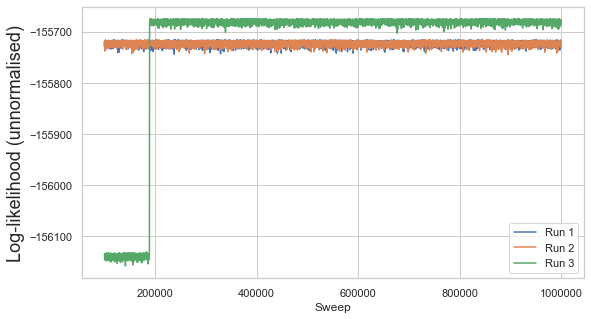

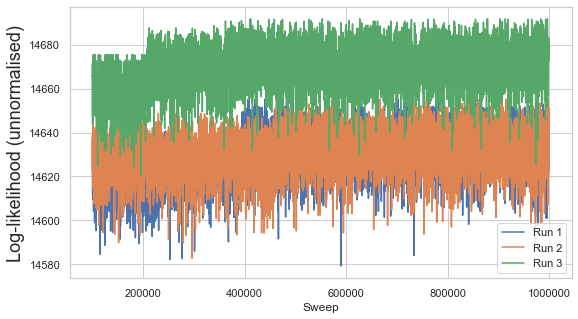

In [112]:
fontsize = 18
fig, ax1 = plt.subplots(1,1, figsize = (9,5))

sns.lineplot(x = 'Sweep', y = 'Log_lik', data = G_bin1_lcc_DCSBM_df_analytics[0].drop(range(1000)), ax = ax1, label = 'Run 1')
sns.lineplot(x = 'Sweep', y = 'Log_lik', data = G_bin1_lcc_DCSBM_df_analytics[1].drop(range(1000)), ax = ax1, label = 'Run 2')
sns.lineplot(x = 'Sweep', y = 'Log_lik', data = G_bin1_lcc_DCSBM_df_analytics[2].drop(range(1000)), ax = ax1, label = 'Run 3')
# ax1.set_title("G_bin1_lcc (DC-SBM)", fontsize = fontsize)
ax1.set_ylabel("Log-likelihood (unnormalised)", fontsize = fontsize)
plt.savefig("Latex/Chapter5/G_bin1_lcc_DCSBM_llk.png", dpi = 400, bbox_inches = 'tight')
plt.show()

fig, ax1 = plt.subplots(1,1, figsize = (9,5))

sns.lineplot(x = 'Sweep', y = 'Log_lik', data = G_bin1_lcc_SBM_df_analytics[0].drop(range(1000)), ax = ax1, label = 'Run 1')
sns.lineplot(x = 'Sweep', y = 'Log_lik', data = G_bin1_lcc_SBM_df_analytics[1].drop(range(1000)), ax = ax1, label = 'Run 2')
sns.lineplot(x = 'Sweep', y = 'Log_lik', data = G_bin1_lcc_SBM_df_analytics[2].drop(range(1000)), ax = ax1, label = 'Run 3')
# ax1.set_title("G_bin1_lcc (SBM)", fontsize = fontsize)
ax1.set_ylabel("Log-likelihood (unnormalised)", fontsize = fontsize)
plt.savefig("Latex/Chapter5/G_bin1_lcc_SBM_llk.png", dpi = 400, bbox_inches = 'tight')
plt.show()

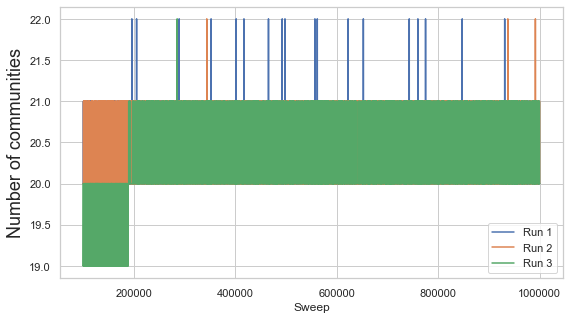

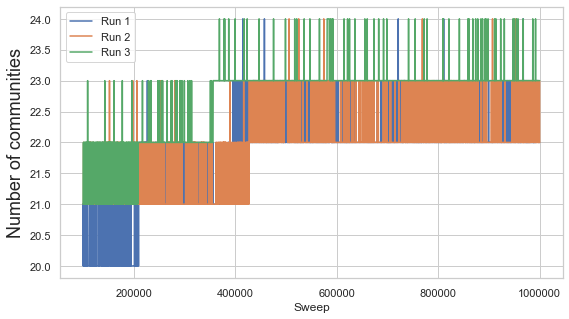

In [121]:
fig, ax1 = plt.subplots(1,1, figsize = (9,5))

sns.lineplot(x = 'Sweep', y = 'K', data = G_bin1_lcc_DCSBM_df_analytics[0].drop(range(1000)), ax = ax1, label = 'Run 1')
sns.lineplot(x = 'Sweep', y = 'K', data = G_bin1_lcc_DCSBM_df_analytics[1].drop(range(1000)), ax = ax1, label = 'Run 2')
sns.lineplot(x = 'Sweep', y = 'K', data = G_bin1_lcc_DCSBM_df_analytics[2].drop(range(1000)), ax = ax1, label = 'Run 3')
# ax1.set_title("G_bin1_lcc")
ax1.set_ylabel("Number of communities", fontsize = fontsize)
plt.savefig("Latex/Chapter5/G_bin1_lcc_DCSBM_K.png", dpi = 400, bbox_inches = 'tight')
plt.show()

fig, ax1 = plt.subplots(1,1, figsize = (9,5))

sns.lineplot(x = 'Sweep', y = 'K', data = G_bin1_lcc_SBM_df_analytics[0].drop(range(1000)), ax = ax1, label = 'Run 1')
sns.lineplot(x = 'Sweep', y = 'K', data = G_bin1_lcc_SBM_df_analytics[1].drop(range(1000)), ax = ax1, label = 'Run 2')
sns.lineplot(x = 'Sweep', y = 'K', data = G_bin1_lcc_SBM_df_analytics[2].drop(range(1000)), ax = ax1, label = 'Run 3')
# ax1.set_title("G_bin1_lcc")
ax1.set_ylabel("Number of communities", fontsize = fontsize)
plt.savefig("Latex/Chapter5/G_bin1_lcc_SBM_K.png", dpi = 400, bbox_inches = 'tight')
plt.show()

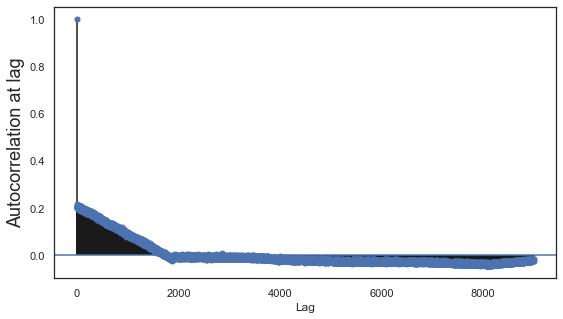

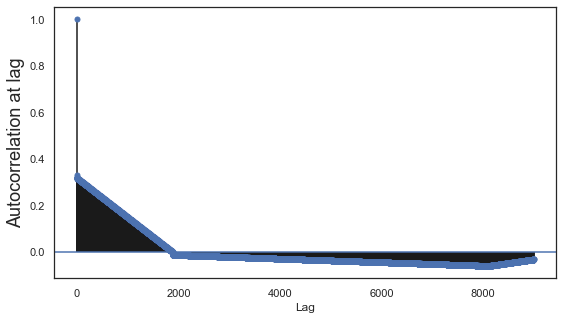

In [160]:
k = 2
fontsize = 18

fig,ax = plt.subplots(figsize=(9,5))
sm.graphics.tsa.plot_acf(np.array(G_bin1_lcc_DCSBM_df_analytics[k]['K']), lags = 9000, alpha = None, ax = ax)
# ax.set_title('Autocorrelation of k', fontsize =  18)
ax.set_title("")
ax.set_ylabel("Autocorrelation at lag", fontsize = fontsize)
ax.set_xlabel("Lag")
plt.savefig("Latex/Chapter5/G_bin1_lcc_DCSBM_ACF_k.png", dpi = 400, bbox_inches = 'tight')
plt.show()

fig,ax = plt.subplots(figsize=(9,5))
sm.graphics.tsa.plot_acf(np.array(G_bin1_lcc_DCSBM_df_analytics[k]['Log_lik']), lags = 9000, alpha = None, ax = ax)
# ax.set_title('Autocorrelation of log-lik', fontsize =  18)
ax.set_title("")
ax.set_ylabel("Autocorrelation at lag", fontsize = fontsize)
ax.set_xlabel("Lag")
plt.savefig("Latex/Chapter5/G_bin1_lcc_DCSBM_ACF_llk.png", dpi = 400, bbox_inches = 'tight')
plt.show()

## G_sample_lcc

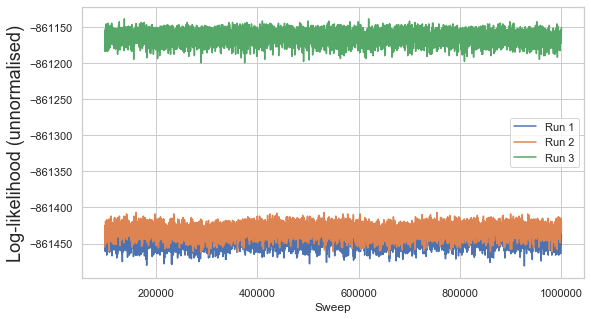

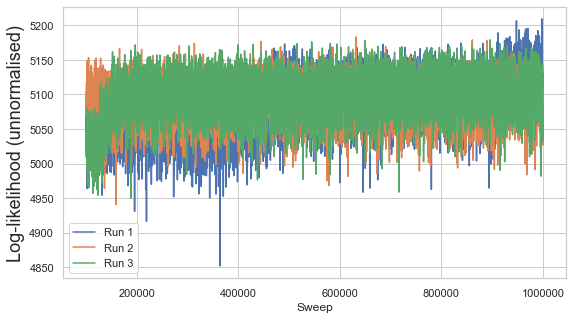

In [120]:
fig, ax1 = plt.subplots(1,1, figsize = (9,5))

sns.lineplot(x = 'Sweep', y = 'Log_lik', data = G_sample_lcc_DCSBM_df_analytics[0].drop(range(1000)), ax = ax1, label = 'Run 1')
sns.lineplot(x = 'Sweep', y = 'Log_lik', data = G_sample_lcc_DCSBM_df_analytics[1].drop(range(1000)), ax = ax1, label = 'Run 2')
sns.lineplot(x = 'Sweep', y = 'Log_lik', data = G_sample_lcc_DCSBM_df_analytics[2].drop(range(1000)), ax = ax1, label = 'Run 3')
# ax1.set_title("G_sample_lcc")
ax1.set_ylabel("Log-likelihood (unnormalised)", fontsize = fontsize)
plt.savefig("Latex/Chapter5/Appendix/G_sample_lcc_DCSBM_llk.png", dpi = 400, bbox_inches = 'tight')
plt.show()

fig, ax1 = plt.subplots(1,1, figsize = (9,5))

sns.lineplot(x = 'Sweep', y = 'Log_lik', data = G_sample_lcc_SBM_df_analytics[0].drop(range(1000)), ax = ax1, label = 'Run 1')
sns.lineplot(x = 'Sweep', y = 'Log_lik', data = G_sample_lcc_SBM_df_analytics[1].drop(range(1000)), ax = ax1, label = 'Run 2')
sns.lineplot(x = 'Sweep', y = 'Log_lik', data = G_sample_lcc_SBM_df_analytics[2].drop(range(1000)), ax = ax1, label = 'Run 3')
# ax1.set_title("G_sample_lcc")
ax1.set_ylabel("Log-likelihood (unnormalised)", fontsize = fontsize)
plt.savefig("Latex/Chapter5/Appendix/G_sample_lcc_SBM_llk.png", dpi = 400, bbox_inches = 'tight')
plt.show()

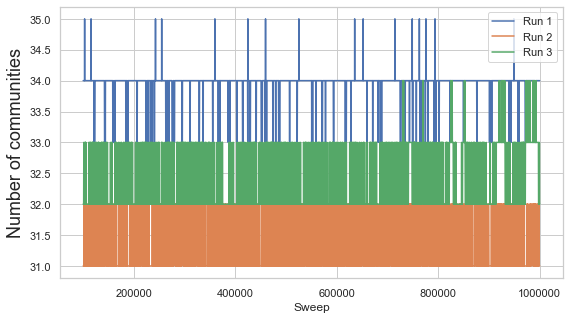

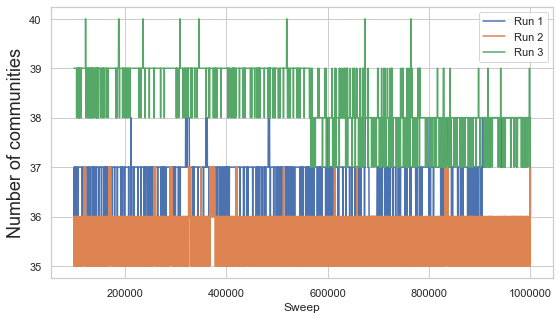

In [122]:
fig, ax1 = plt.subplots(1,1, figsize = (9,5))

sns.lineplot(x = 'Sweep', y = 'K', data = G_sample_lcc_DCSBM_df_analytics[0].drop(range(1000)), ax = ax1, label = 'Run 1')
sns.lineplot(x = 'Sweep', y = 'K', data = G_sample_lcc_DCSBM_df_analytics[1].drop(range(1000)), ax = ax1, label = 'Run 2')
sns.lineplot(x = 'Sweep', y = 'K', data = G_sample_lcc_DCSBM_df_analytics[2].drop(range(1000)), ax = ax1, label = 'Run 3')
# ax1.set_title("G_sample_lcc")
ax1.set_ylabel("Number of communities", fontsize = fontsize)
plt.savefig("Latex/Chapter5/Appendix/G_sample_lcc_DCSBM_K.png", dpi = 400, bbox_inches = 'tight')
plt.show()

fig, ax1 = plt.subplots(1,1, figsize = (9,5))

sns.lineplot(x = 'Sweep', y = 'K', data = G_sample_lcc_SBM_df_analytics[0].drop(range(1000)), ax = ax1, label = 'Run 1')
sns.lineplot(x = 'Sweep', y = 'K', data = G_sample_lcc_SBM_df_analytics[1].drop(range(1000)), ax = ax1, label = 'Run 2')
sns.lineplot(x = 'Sweep', y = 'K', data = G_sample_lcc_SBM_df_analytics[2].drop(range(1000)), ax = ax1, label = 'Run 3')
# ax1.set_title("G_sample_lcc")
ax1.set_ylabel("Number of communities", fontsize = fontsize)
plt.savefig("Latex/Chapter5/Appendix/G_sample_lcc_SBM_K.png", dpi = 400, bbox_inches = 'tight')
plt.show()

In [57]:
import statsmodels.api as sm

# PSM

In [70]:
def get_pairs_lcc(data, G):
    data_lcc = filter_data(filter_data(data, 'source_ind', G), 'target_ind', G)
    
    # prepare LCC data
    node_pairs_lcc = data_lcc[['source_ind', 'target_ind']].values

    pair_convert = {}
    for i, key in enumerate(G):
        pair_convert[key] = i

    pairs_lcc = np.copy(node_pairs_lcc)
    for key, value in pair_convert.items():
        pairs_lcc[node_pairs_lcc == key] = value
        
    return(pairs_lcc)

In [71]:
pairs_lcc_1 = get_pairs_lcc(data, G_bin1_lcc)
pairs_lcc = data[['source_ind', 'target_ind']].values

In [125]:
def get_pi(cluster, pairs):
    '''Returns posterior similarity matrix of MCMC output, based on vector of pair indices'''
    sim_vec = np.zeros(len(pairs)).astype(int)

    for i in tqdm(cluster.columns):
        sim_vec = sim_vec + (cluster[i][pairs[:,0]].values == cluster[i][pairs[:,1]].values).astype(int)
    return(squareform(sim_vec)/cluster.shape[1])

def plt_adj_heat(clustering, A_adj, title, cmap, save_name):
    '''Plot heatmap of adjacency matrix.'''
    
    # get indices to rearrange the matrix
    mat_sort = np.argsort(clustering)
    mat_sort_len = cluster_order(clustering, style = 'index')[:,1]

    fig,ax = plt.subplots(figsize=(15,15))
    sns.heatmap(A_adj[:,mat_sort][mat_sort,:], cmap = cmap, ax = ax)
    
    # Relabel x and y axis
    xticks = np.concatenate((np.zeros(1), np.cumsum(mat_sort_len)[:len(mat_sort_len) - 1])) + mat_sort_len/2
    plt.xticks(xticks, labels = range(len(xticks)))
    plt.yticks(xticks, labels = range(len(xticks)))
    ax.tick_params(labelbottom=False,labeltop=True)
    
    # Add title
#     plt.title(title)
    
    # Add rectangles
    j = 0
    for i in mat_sort_len:
        ax.add_patch(Rectangle((j, j), i, i, fill = False, edgecolor='blue', lw=3))
        j += i
    
    plt.savefig(save_name, dpi = 400, bbox_inches = 'tight')
    plt.show()

## G_bin1_lcc

In [75]:
j = 0
psm4 = get_pi(G_bin1_lcc_DCSBM_df[j], pairs_lcc_1)   

NameError: name 'get_scores' is not defined

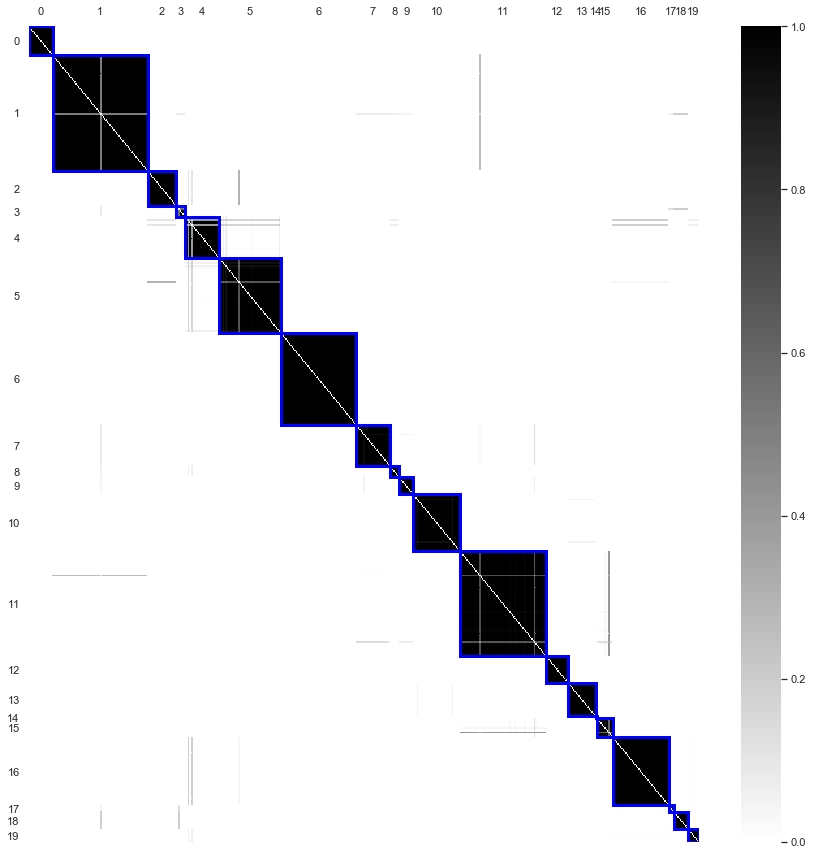

In [126]:
# A = nx.adjacency_matrix(G_bin1_lcc).todense()
title = 'test'
cmap = 'gray_r'
clustering = c_G_bin1_lcc['DCSBM_Dahl1'][G_bin1_lcc]
save_name = "Latex/Chapter5/G_bin1_lcc_DCSBM_Dahl1_psm.png"

plt_adj_heat(clustering, psm4, title, 'gray_r', save_name)

# Number of communities

In [36]:
c_G_bin1_lcc_mu25 = pd.read_csv("MCMC_clusters/c_G_bin1_lcc_mu25.csv")
c_G_bin1_lcc_mu50 = pd.read_csv("MCMC_clusters/c_G_bin1_lcc_mu50.csv")
c_G_bin1_lcc_mu75 = pd.read_csv("MCMC_clusters/c_G_bin1_lcc_mu75.csv")
c_G_bin1_lcc_mu100 = pd.read_csv("MCMC_clusters/c_G_bin1_lcc_mu100.csv")
c_G_bin1_lcc_mu125 = pd.read_csv("MCMC_clusters/c_G_bin1_lcc_mu125.csv")
c_G_bin1_lcc_mu150 = pd.read_csv("MCMC_clusters/c_G_bin1_lcc_mu150.csv")

c_G_sample_lcc_mu25 = pd.read_csv("MCMC_clusters/c_G_sample_lcc_mu25.csv")
c_G_sample_lcc_mu50 = pd.read_csv("MCMC_clusters/c_G_sample_lcc_mu50.csv")
c_G_sample_lcc_mu75 = pd.read_csv("MCMC_clusters/c_G_sample_lcc_mu75.csv")
c_G_sample_lcc_mu100 = pd.read_csv("MCMC_clusters/c_G_sample_lcc_mu100.csv")
c_G_sample_lcc_mu125 = pd.read_csv("MCMC_clusters/c_G_sample_lcc_mu125.csv")
c_G_sample_lcc_mu150 = pd.read_csv("MCMC_clusters/c_G_sample_lcc_mu150.csv")

In [37]:
k = 21
mu_type = (["G_bin1_lcc"]*k+["G_sample_lcc"]*k)
mu_score = (['DCSBM_MAP1','DCSBM_MAP2','DCSBM_MAP3'])*14
# mu_no = ([1, 25, 50, 75, 100, 125, 150])*6
mu_no = (['1']*3 + ['25']*3 + ['50']*3 + ['75']*3 + ['100']*3 + ['125']*3 + ['150']*3)*2
mu_k = np.hstack((c_G_bin1_lcc.iloc[:,5:8].max(),
            c_G_bin1_lcc_mu25.iloc[:,5:].max(),
           c_G_bin1_lcc_mu50.iloc[:,5:].max(),
           c_G_bin1_lcc_mu75.iloc[:,5:].max(),
           c_G_bin1_lcc_mu100.iloc[:,5:].max(),
           c_G_bin1_lcc_mu125.iloc[:,5:].max(),
           c_G_bin1_lcc_mu150.iloc[:,5:].max(),
           c_G_sample_lcc.iloc[:,5:8].max(),
           c_G_sample_lcc_mu25.iloc[:,5:].max(),
           c_G_sample_lcc_mu50.iloc[:,5:].max(),
           c_G_sample_lcc_mu75.iloc[:,5:].max(),
           c_G_sample_lcc_mu100.iloc[:,5:].max(),
           c_G_sample_lcc_mu125.iloc[:,5:].max(),
           c_G_sample_lcc_mu150.iloc[:,5:].max())) + 1
mu_summary = pd.DataFrame(data = {'Network': mu_type,
                                  'Method': mu_score,
                                  'mu': np.array(mu_no).astype(int),
                                  'Estimate': mu_k})
mu_summary.to_csv("MCMC_clusters/mu_summary.csv", index = None)

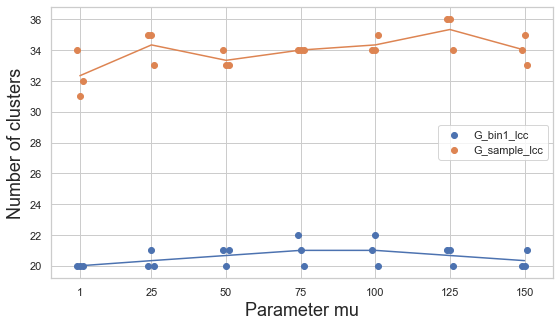

In [44]:
fontsize = 18
sns.set_style("whitegrid")
plt.figure(figsize = (9,5))
jit = np.array(['-1', '0','1']*7).astype(int)

df_bin1 = filter_data(mu_summary, 'Network', ['G_bin1_lcc'])
df_bin1_avg = df_bin1.groupby('mu').mean().reset_index()
df_sample = filter_data(mu_summary, 'Network', ['G_sample_lcc'])
df_sample_avg = df_sample.groupby('mu').mean().reset_index()

plt.scatter(df_bin1['mu'] + jit, df_bin1[['Estimate']], label = 'G_bin1_lcc')
plt.plot(df_bin1_avg['mu'], df_bin1_avg[['Estimate']])

plt.scatter(df_sample['mu'] + jit, df_sample['Estimate'], label = 'G_sample_lcc')
plt.plot(df_sample_avg['mu'], df_sample_avg[['Estimate']])
plt.xticks(np.array([1,25,50,75,100,125,150]))
plt.xlabel("Parameter mu", fontsize = fontsize); plt.ylabel("Number of clusters", fontsize = fontsize)
plt.legend()
plt.savefig("Latex/Chapter5/mu_summary.png", dpi= 400, bbox_inches = 'tight')
plt.show()

# New Prior

In [ ]:
dir_np + 'G_bin1_lcc/'

In [98]:
G_bin1_lcc_DCSBM_np = pd.read_csv(dir_np + 'G_bin1_lcc/' + "dcsbm_alloc.csv", header = None).T
G_bin1_lcc_DCSBM_np_alloc = pd.read_csv(dir_np + 'G_bin1_lcc/' + "dcsbm_analytics.csv",
                                                     header = None, names = col_names, index_col = False)

In [100]:
m = np.argmax(G_bin1_lcc_DCSBM_np_alloc['Log_lik'])

In [103]:
c_G_bin1_lcc_DCSBM_np = meta.copy()
c_G_bin1_lcc_DCSBM_np['MAP'] = 0

c_G_bin1_lcc_DCSBM_np.iloc[list(G_bin1_lcc.nodes()),
                           c_G_bin1_lcc_DCSBM_np.columns.get_indexer(['MAP'])] = G_bin1_lcc_DCSBM_np.iloc[:,m].values

In [104]:
c_G_bin1_lcc_DCSBM_np

,Sample,Site,Year,k13Class,crt_class,MAP
0,PD0498-C,ETH,2011,R539T,no_nea,0
1,PD0500-C,ETH,2011,C580Y,no_nea,0
2,PD0501-C,ETH,2011,C580Y,no_nea,0
3,PD0502-C,ETH,2011,R539T,no_nea,0
4,PD0575-C,ETH,2012,R539T,no_nea,0
...,...,...,...,...,...,...
1463,RCN13097,NEKH,2017,C580Y,T93S,19
1464,RCN13098,NEKH,2017,C580Y,T93S,29
1465,RCN13100,NEKH,2018,C580Y,T93S,3
1466,RCN13101,NEKH,2018,WT,H97Y,0


# Visualisations

In [127]:
from matplotlib.colors import ListedColormap
my_cmap = ListedColormap(sns.color_palette('colorblind').as_hex())

In [128]:
def plt_cluster_bar(clust, x_str, hue_str,save_name, title, fontsize = 18):
    sns.set_style("whitegrid")
    df = clust.groupby([hue_str, x_str]).size().reset_index()
    df = df.pivot(columns = x_str, index = hue_str, values=0)
    
    if(len(df > 25)):
        df = df.iloc[:25,:]
    
    ax = df.plot(kind = 'bar', stacked = True, figsize = (9,5),colormap = my_cmap)
                
    ax.set_xticklabels("")
    ax.set_ylabel(ylabel = 'Count', fontsize = fontsize)
    ax.set_xlabel(xlabel = 'Cluster', fontsize = fontsize)
    ax.set_title(title, fontsize = fontsize)
    fig = ax.get_figure()
    fig.savefig(save_name, dpi = 400, bbox_inches = 'tight')

In [149]:
def plt_graph_clusters(G, pos, clustering, label_dict, title, save_file, plt_size, font_size, dpi, color_bool):
    '''Plt network graph with clusters. Use plt_size = 120 for LCC, and plt_size = 200 for full network.
    Example: plt_graph_clusters(H, pos, graph_clusters, label_dict = label_dict,
                  title = "Clustering", save_file = "test_clauset.png", plt_size = 200)'''
    # get colours
    my_cmap = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple',
           'tab:brown','tab:pink','tab:olive','tab:cyan']
    my_markers = ['o', 'v', '*', 'h','s','p', 'P']
    col_list = list(itertools.product(*[my_markers, my_cmap]))
    
    # plot graph
    fig = plt.figure(figsize = (plt_size*1.2, plt_size))
    fraction = plt_size/270
    
    # Draw nodes
    for i in range(clustering.min(), clustering.max()+1):
        # get list of nodes to colour
        nodelist = list(clustering.index[clustering == i])
        
        # colour "too long" clusters with gray diamonds
        if(i == 36):
            label = '>' + str(36+1)
            my_mark = 'D'
            my_col = 'gray'
        elif(i > 36):
            label = ''
            my_mark = 'D'
            my_col = 'gray'
        else:
            label = str(i + 1) + " (" + str(len(nodelist)) + ")"
            my_mark, my_col = col_list[i]
        
        # Draw nodes within speicfic cluster
        nx.draw_networkx_nodes(G, pos = pos, nodelist = nodelist,
                               node_color = my_col, node_shape = my_mark, node_size = 3000*fraction,
                               label = label) # edgecolors = 'tan' 
    
    # Draw edges
    if (color_bool):
        # add colorbar if color_bool == True
        weights_edge = list((nx.get_edge_attributes(G, 'weight').values()))
        my_cmap = plt.get_cmap('RdYlGn')
        nx.draw_networkx_edges(G, pos = pos, width = 1.6, edge_color = weights_edge, alpha = 0.3,
                             edge_cmap = my_cmap, edge_vmin = 0, edge_vmax = 1)

        # add colorbar
        sm = plt.cm.ScalarMappable(cmap = my_cmap, norm = plt.Normalize(vmin = 0, vmax = 1))
        sm._A = []
        cbar = plt.colorbar(sm, shrink = 0.3, pad = 0.01, orientation="horizontal")
        cbar.ax.tick_params(labelsize = plt_size*1.3)

    else:
        # otherwise leave gray
        nx.draw_networkx_edges(G, pos = pos, width = 4, alpha = 0.8, edge_color = '#DCDCDC')
        # nx.draw_networkx_edges(G, pos = pos, width = 5, alpha = 0.5, edge_color = '#000000')
    
    # Add legend on the side
    lg = plt.legend(scatterpoints = 1, markerscale = 15*fraction, prop = {'size': plt_size},
               title = "Cluster (size)", title_fontsize = plt_size*1.1,
               bbox_to_anchor = (1.004, 1.0), loc = 'upper left')
    plt.tight_layout()
    plt.title(title, fontsize = plt_size*2, pad = plt_size*1.1)
    
    # save plot
    plt.savefig(save_file, dpi = dpi, bbox_extra_artists = (lg,), bbox_inches = 'tight')
    plt.close(fig)
    
sns.set_style("white")

In [140]:
ind = 5
_,c_G_bin1_lcc_reindex = cluster_reindex(c_G_bin1_lcc.iloc[list(G_bin1_lcc.nodes()),:], ind)
_,c_G_sample_lcc_reindex = cluster_reindex(c_G_sample_lcc.iloc[list(G_sample_lcc.nodes()),:], ind)
_,c_G_bin1_lcc_DCSBM_np_reindex = cluster_reindex(c_G_bin1_lcc_DCSBM_np.iloc[list(G_bin1_lcc.nodes()),:], ind)
_,c_G_sub50_reindex = cluster_reindex(c_G_sub50.iloc[list(G_sub50.nodes()),:], ind)

ipynb.fs.full.functions_cluster_analysis:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipynb.fs.full.functions_cluster_analysis:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipynb.fs.full.functions_cluster_analysis:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipynb.fs.full.functions_cluster_analysis:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentatio

ipynb.fs.full.functions_cluster_analysis:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipynb.fs.full.functions_cluster_analysis:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipynb.fs.full.functions_cluster_analysis:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipynb.fs.full.functions_cluster_analysis:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentatio

ipynb.fs.full.functions_cluster_analysis:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipynb.fs.full.functions_cluster_analysis:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipynb.fs.full.functions_cluster_analysis:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipynb.fs.full.functions_cluster_analysis:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentatio

ipynb.fs.full.functions_cluster_analysis:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipynb.fs.full.functions_cluster_analysis:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipynb.fs.full.functions_cluster_analysis:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipynb.fs.full.functions_cluster_analysis:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentatio

ipynb.fs.full.functions_cluster_analysis:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipynb.fs.full.functions_cluster_analysis:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipynb.fs.full.functions_cluster_analysis:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipynb.fs.full.functions_cluster_analysis:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentatio

ipynb.fs.full.functions_cluster_analysis:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipynb.fs.full.functions_cluster_analysis:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipynb.fs.full.functions_cluster_analysis:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipynb.fs.full.functions_cluster_analysis:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentatio

ipynb.fs.full.functions_cluster_analysis:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipynb.fs.full.functions_cluster_analysis:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipynb.fs.full.functions_cluster_analysis:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipynb.fs.full.functions_cluster_analysis:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentatio

ipynb.fs.full.functions_cluster_analysis:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipynb.fs.full.functions_cluster_analysis:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipynb.fs.full.functions_cluster_analysis:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipynb.fs.full.functions_cluster_analysis:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentatio

ipynb.fs.full.functions_cluster_analysis:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipynb.fs.full.functions_cluster_analysis:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipynb.fs.full.functions_cluster_analysis:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipynb.fs.full.functions_cluster_analysis:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentatio

ipynb.fs.full.functions_cluster_analysis:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipynb.fs.full.functions_cluster_analysis:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipynb.fs.full.functions_cluster_analysis:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipynb.fs.full.functions_cluster_analysis:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentatio

ipynb.fs.full.functions_cluster_analysis:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipynb.fs.full.functions_cluster_analysis:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipynb.fs.full.functions_cluster_analysis:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipynb.fs.full.functions_cluster_analysis:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentatio

ipynb.fs.full.functions_cluster_analysis:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipynb.fs.full.functions_cluster_analysis:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipynb.fs.full.functions_cluster_analysis:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipynb.fs.full.functions_cluster_analysis:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentatio

ipynb.fs.full.functions_cluster_analysis:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipynb.fs.full.functions_cluster_analysis:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipynb.fs.full.functions_cluster_analysis:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipynb.fs.full.functions_cluster_analysis:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentatio

ipynb.fs.full.functions_cluster_analysis:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipynb.fs.full.functions_cluster_analysis:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipynb.fs.full.functions_cluster_analysis:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipynb.fs.full.functions_cluster_analysis:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentatio

ipynb.fs.full.functions_cluster_analysis:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipynb.fs.full.functions_cluster_analysis:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipynb.fs.full.functions_cluster_analysis:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipynb.fs.full.functions_cluster_analysis:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentatio

ipynb.fs.full.functions_cluster_analysis:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipynb.fs.full.functions_cluster_analysis:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipynb.fs.full.functions_cluster_analysis:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipynb.fs.full.functions_cluster_analysis:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentatio

ipynb.fs.full.functions_cluster_analysis:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipynb.fs.full.functions_cluster_analysis:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipynb.fs.full.functions_cluster_analysis:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipynb.fs.full.functions_cluster_analysis:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentatio

ipynb.fs.full.functions_cluster_analysis:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipynb.fs.full.functions_cluster_analysis:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipynb.fs.full.functions_cluster_analysis:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipynb.fs.full.functions_cluster_analysis:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentatio

ipynb.fs.full.functions_cluster_analysis:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipynb.fs.full.functions_cluster_analysis:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipynb.fs.full.functions_cluster_analysis:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipynb.fs.full.functions_cluster_analysis:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentatio

ipynb.fs.full.functions_cluster_analysis:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipynb.fs.full.functions_cluster_analysis:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipynb.fs.full.functions_cluster_analysis:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipynb.fs.full.functions_cluster_analysis:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentatio

ipynb.fs.full.functions_cluster_analysis:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipynb.fs.full.functions_cluster_analysis:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipynb.fs.full.functions_cluster_analysis:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipynb.fs.full.functions_cluster_analysis:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentatio

In [150]:
# convert nodes from numbers to parasite names
parasites_dict = {}
for key, value in enumerate(parasites):
    parasites_dict[key] = value
    
parasites_dict_lcc = {n: lab for n, lab in parasites_dict.items() if n in G_bin1_lcc}

## Bars

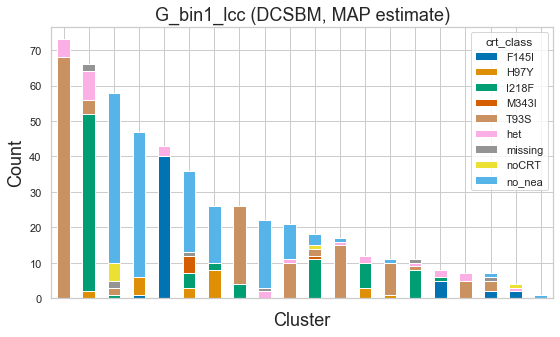

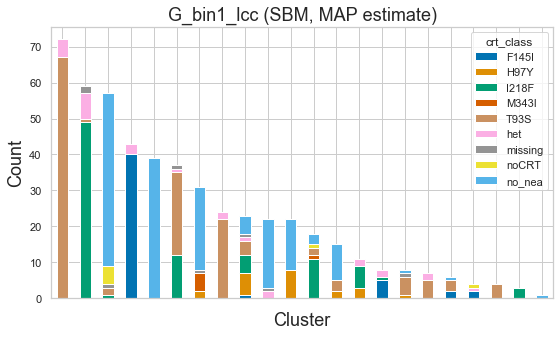

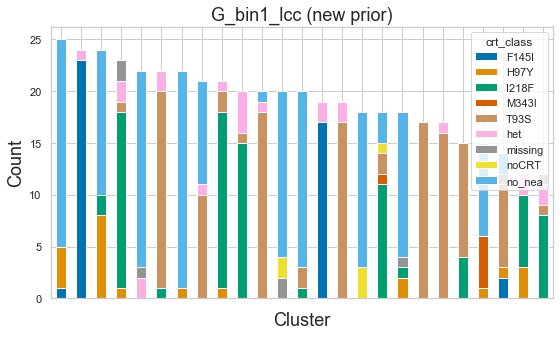

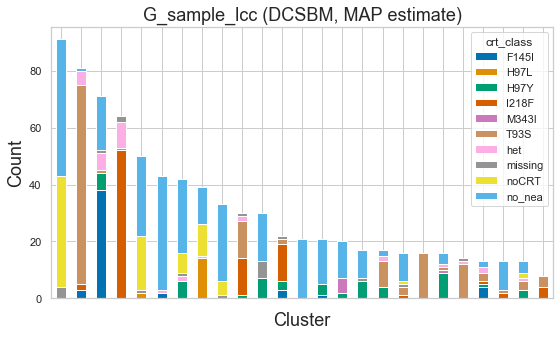

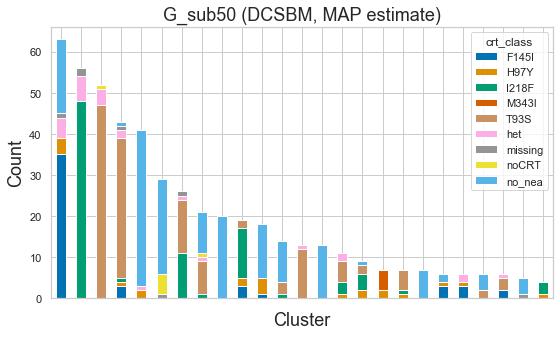

In [147]:
plt_cluster_bar(c_G_bin1_lcc_reindex,
                'crt_class', 'DCSBM_MAP1', "Latex/Chapter5/G_bin1_lcc_DCSBM_MAP_bar.png",
                "G_bin1_lcc (DCSBM, MAP estimate)")
plt_cluster_bar(c_G_bin1_lcc_reindex,
                'crt_class', 'SBM_MAP1', "Latex/Chapter5/G_bin1_lcc_SBM_MAP_bar.png",
                "G_bin1_lcc (SBM, MAP estimate)")
plt_cluster_bar(c_G_bin1_lcc_DCSBM_np_reindex,
                'crt_class', 'MAP', "Latex/Chapter5/G_bin1_lcc_DCSBM_np_MAP_bar.png",
                "G_bin1_lcc (new prior)")

plt_cluster_bar(c_G_sample_lcc_reindex,
                'crt_class', 'DCSBM_MAP1',
                "Latex/Chapter5/Appendix/G_sample_lcc_DCSBM_MAP_bar.png",
                "G_sample_lcc (DCSBM, MAP estimate)")
plt_cluster_bar(c_G_sample_lcc_reindex,
                'crt_class', 'SBM_MAP1',
                "Latex/Chapter5/Appendix/G_sample_lcc_SBM_MAP_bar.png",
                "G_sample_lcc (SBM, MAP estimate)")
plt_cluster_bar(c_G_sub50_reindex,
                'crt_class', 'DCSBM_MAP1',
                "Latex/Chapter5/G_sub50_DCSBM_MAP_bar.png",
                "G_sub50 (DCSBM, MAP estimate)")

## G_bin1_lcc

In [157]:
pos = nx.nx_agraph.graphviz_layout(G_bin1_lcc, prog = 'neato')
label_dict = parasites_dict

# Plot characteristics
plt_size = 30
dpi = 70
font_size = 32
color_bool = False

### DCSBM

In [152]:
# change for specific below
G = G_bin1_lcc.copy()
clustering = c_G_bin1_lcc_reindex['DCSBM_MAP1']
# clustering.index = lcc_ind
label_dict = parasites_dict_lcc

str_save = "Latex/Chapter5/G_bin1_lcc_DCSBM_MAP.png"
str_title = "G_bin1_lcc (DC-SBM, MAP estimate)"

plt_graph_clusters(G, pos, clustering, label_dict, str_title, str_save, plt_size, font_size, dpi, color_bool)

### SBM

In [153]:
# change for specific below
G = G_bin1_lcc.copy()
clustering = c_G_bin1_lcc_reindex['SBM_MAP1']
# clustering.index = lcc_ind
label_dict = parasites_dict_lcc

str_save = "Latex/Chapter5/G_bin1_lcc_SBM_MAP.png"
str_title = "G_bin1_lcc (SBM, MAP estimate)"

plt_graph_clusters(G, pos, clustering, label_dict, str_title, str_save, plt_size, font_size, dpi, color_bool)

### New Prior

In [158]:
# change for specific below
G = G_bin1_lcc.copy()
clustering = c_G_bin1_lcc_DCSBM_np_reindex['MAP']
# clustering.index = lcc_ind
label_dict = parasites_dict_lcc

str_save = "Latex/Chapter5/G_bin1_lcc_DCSBM_np_MAP.png"
str_title = "G_bin1_lcc with modified prior (DCSBM, MAP estimate)"

plt_graph_clusters(G, pos, clustering, label_dict, str_title, str_save, plt_size, font_size, dpi, color_bool)

## G_sample_lcc

In [154]:
pos = nx.nx_agraph.graphviz_layout(G_sample_lcc, prog = 'neato')

### DCSBM

In [155]:
# change for specific below
G = G_sample_lcc.copy()
clustering = c_G_sample_lcc_reindex['DCSBM_MAP1']
# clustering.index = lcc_ind
label_dict = parasites_dict_lcc

str_save = "Latex/Chapter5/Appendix/G_sample_lcc_DCSBM_MAP.png"
str_title = "G_sample_lcc (DC-SBM, MAP estimate)"

plt_graph_clusters(G, pos, clustering, label_dict, str_title, str_save, plt_size, font_size, dpi, color_bool)

### SBM

In [156]:
# change for specific below
G = G_sample_lcc.copy()
clustering = c_G_sample_lcc_reindex['SBM_MAP1']
# clustering.index = lcc_ind
label_dict = parasites_dict_lcc

str_save = "Latex/Chapter5/Appendix/G_sample_lcc_SBM_MAP.png"
str_title = "G_sample_lcc (SBM, MAP estimate)"

plt_graph_clusters(G, pos, clustering, label_dict, str_title, str_save, plt_size, font_size, dpi, color_bool)

## G_sub50

In [159]:
# change for specific below
G = G_bin1_lcc.copy()
clustering = c_G_sub50_reindex['DCSBM_MAP1']
# clustering.index = lcc_ind
label_dict = parasites_dict_lcc

str_save = "Latex/Chapter5/G_sub50_DCSBM_np_MAP.png"
str_title = "G_sub50 (DCSBM, MAP estimate)"

plt_graph_clusters(G, pos, clustering, label_dict, str_title, str_save, plt_size, font_size, dpi, color_bool)